In [2]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [3]:
data = np.load('mnist.npz')

In [4]:
X_train_raw = data['x_train']
y_train = data['y_train']
X_test_raw = data['x_test']
y_test = data['y_test']
X_train = X_train_raw.reshape((X_train_raw.shape[0], -1))
X_test = X_test_raw.reshape((X_test_raw.shape[0], -1))
# print(X_train, X_test)

data.close()

In [5]:
selected_samples = np.empty((1000, 784))
for digit in range(10):
    indices = np.where(y_train == digit)[0]
    chosen_indices = np.random.choice(indices, 100, replace=False)
    selected_samples[digit*100:(digit+1)*100, :] = X_train[chosen_indices]
print(selected_samples, selected_samples.shape)
X = selected_samples.T
# print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (1000, 784)
(784, 1000)


In [6]:
mean_vals = np.mean(X, axis = 0)
X_central = X - mean_vals
# print(X)
# print(X_central)

S = np.dot(X_central, X_central.T) / 999
# S = np.cov(X, rowvar = False)

eigenvalues, eigenvectors = eig(S)

idx = eigenvalues.argsort()[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

# need to normalise the vectors



# print(eigenvalues_sorted)
U = eigenvectors_sorted
U_normalized = U / np.linalg.norm(U, axis=0)
print(U, U.shape)

[[ 0.027618  +0.j          0.00872337+0.j         -0.00096892+0.j
  ...  0.00975586+0.j          0.01136247-0.02041372j
   0.01136247+0.02041372j]
 [ 0.027618  +0.j          0.00872337+0.j         -0.00096892+0.j
  ... -0.0105749 +0.j         -0.03745714+0.03733385j
  -0.03745714-0.03733385j]
 [ 0.027618  +0.j          0.00872337+0.j         -0.00096892+0.j
  ... -0.02499372+0.j          0.0184915 -0.00440774j
   0.0184915 +0.00440774j]
 ...
 [ 0.027618  +0.j          0.00872337+0.j         -0.00096892+0.j
  ...  0.00502776+0.j          0.01470256-0.00100063j
   0.01470256+0.00100063j]
 [ 0.027618  +0.j          0.00872337+0.j         -0.00096892+0.j
  ...  0.00506937+0.j          0.01453228-0.00114875j
   0.01453228+0.00114875j]
 [ 0.027618  +0.j          0.00872337+0.j         -0.00096892+0.j
  ...  0.00135176+0.j          0.01386298-0.00184436j
   0.01386298+0.00184436j]] (784, 784)


In [7]:
Y = np.dot(U.T, X_central)          
# print(Y)
# print(Y, Y.shape)

X_recon = np.dot(U, Y)
# print(X_recon)

MSE = np.mean((X_recon - X_central) ** 2)
print('MSE = ',MSE)

MSE =  (3.2062275057397603e-21+2.606234461464419e-39j)


p = 5

label = 0


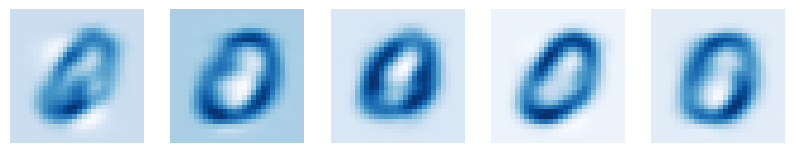

label = 1


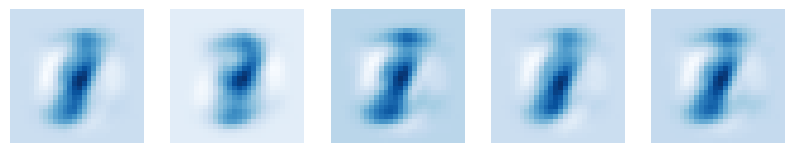

label = 2


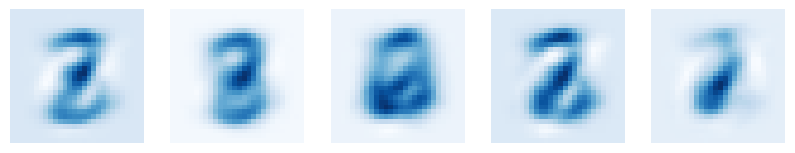

label = 3


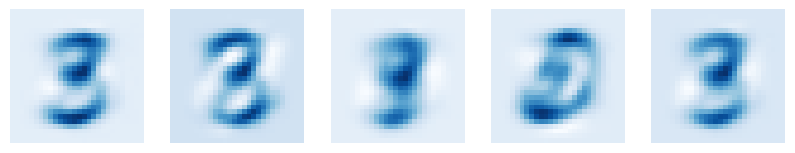

label = 4


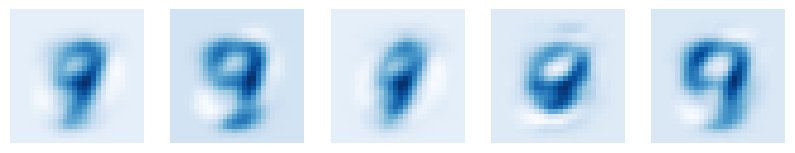

label = 5


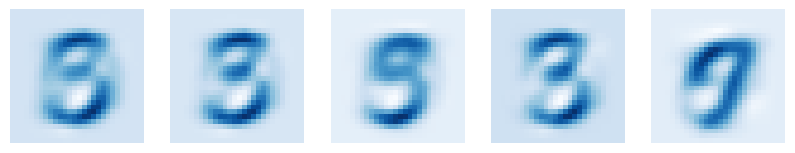

label = 6


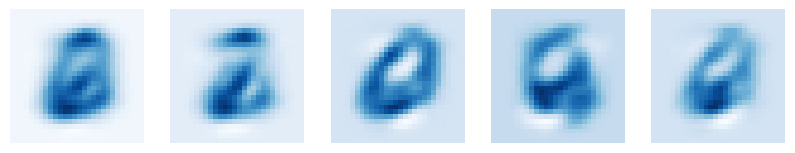

label = 7


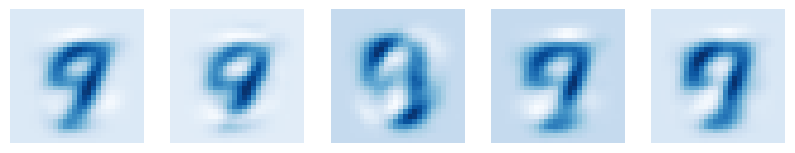

label = 8


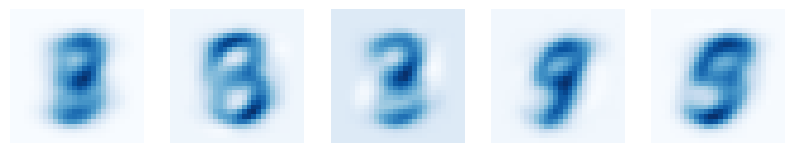

label = 9


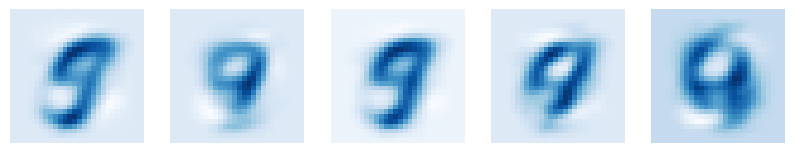

p = 10

label = 0


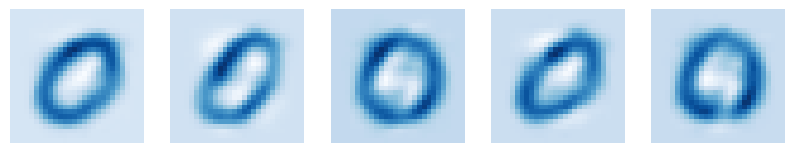

label = 1


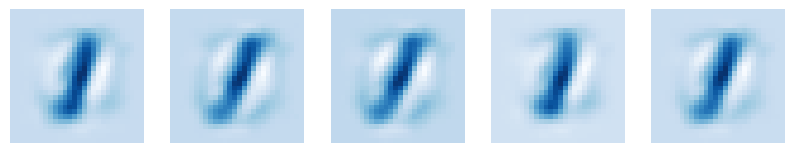

label = 2


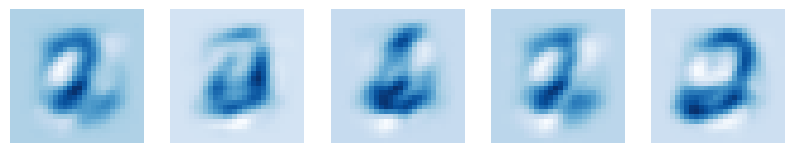

label = 3


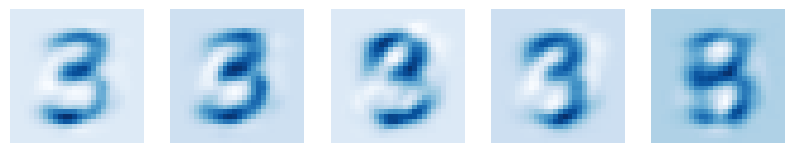

label = 4


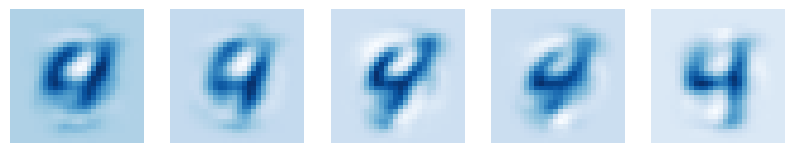

label = 5


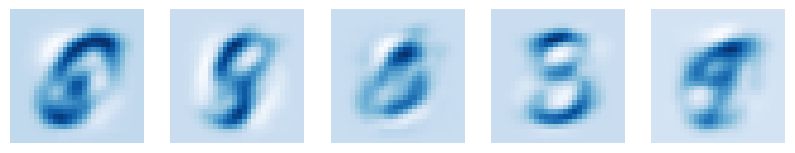

label = 6


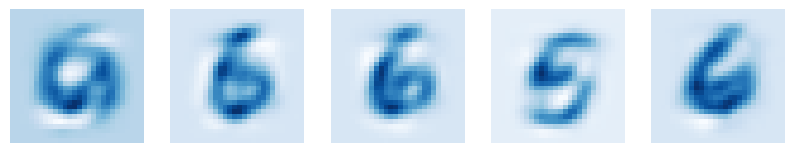

label = 7


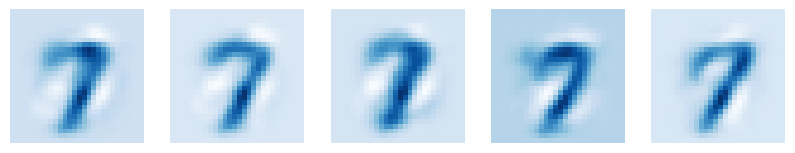

label = 8


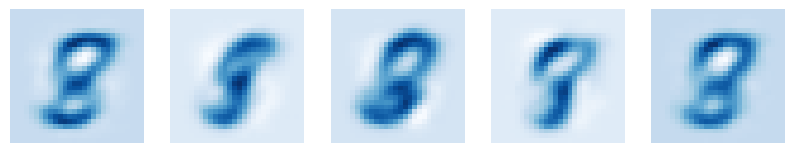

label = 9


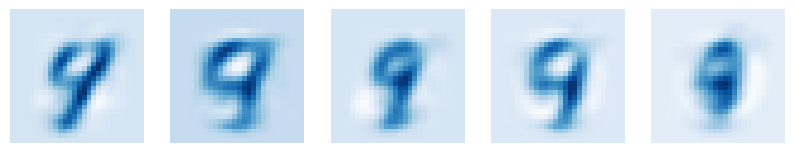

p = 20

label = 0


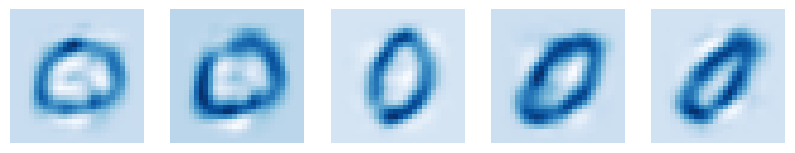

label = 1


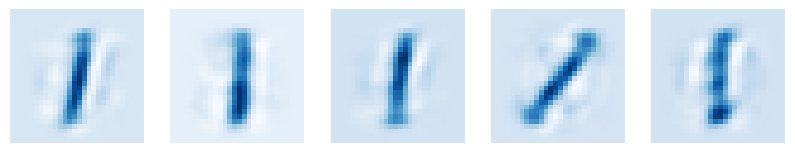

label = 2


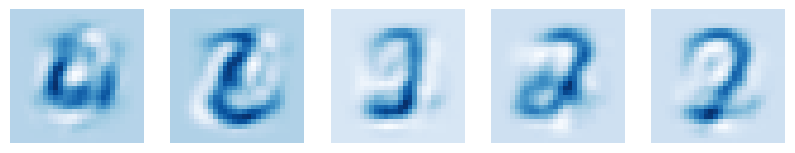

label = 3


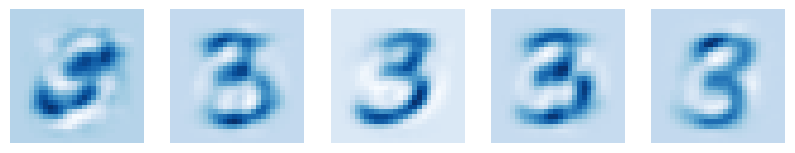

label = 4


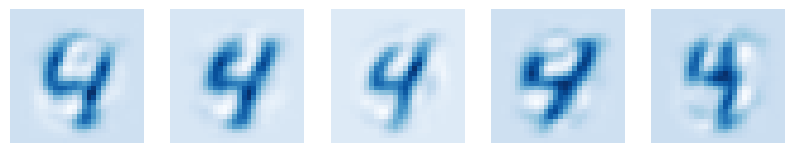

label = 5


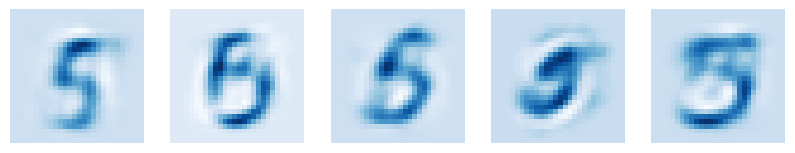

label = 6


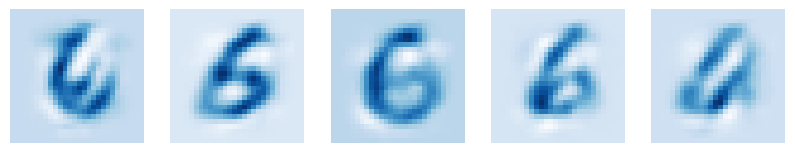

label = 7


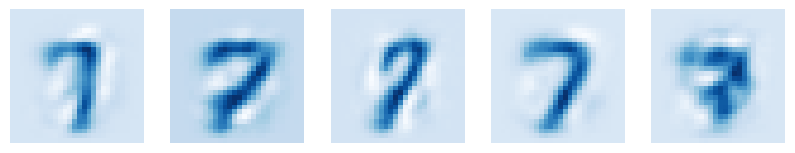

label = 8


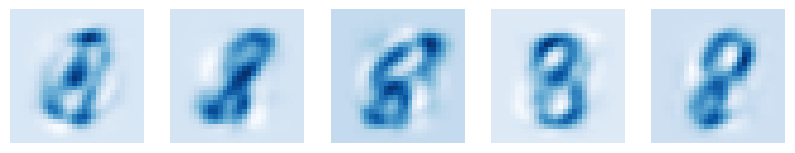

label = 9


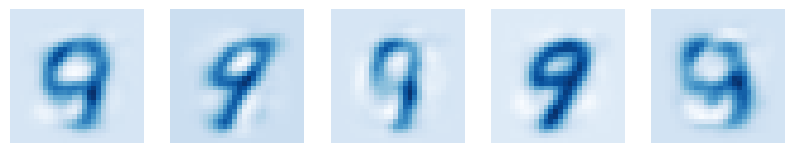

p = 100

label = 0


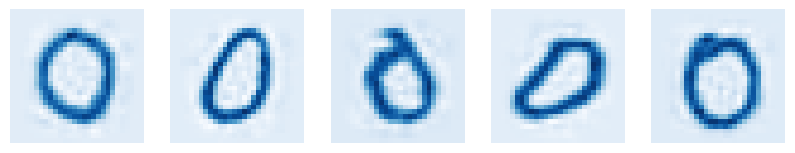

label = 1


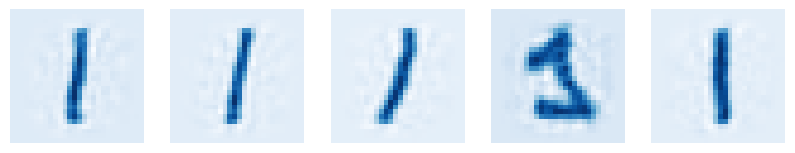

label = 2


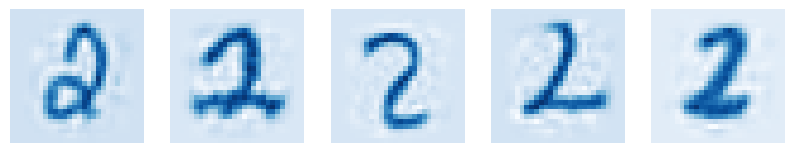

label = 3


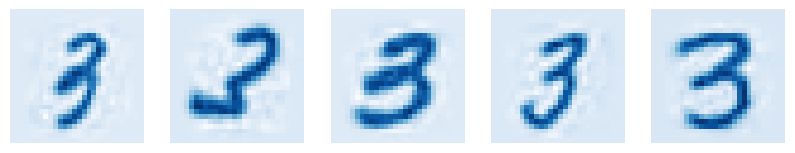

label = 4


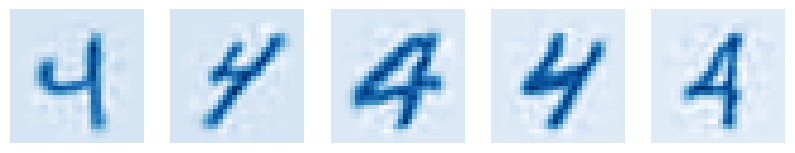

label = 5


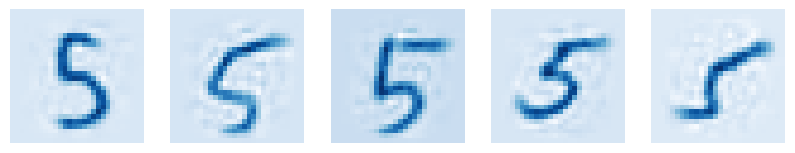

label = 6


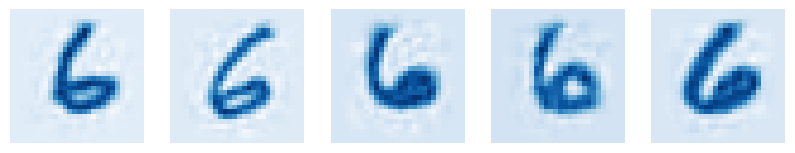

label = 7


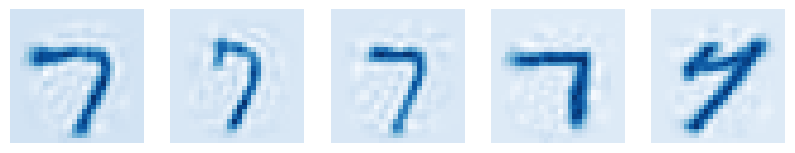

label = 8


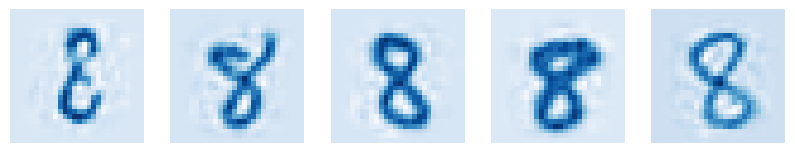

label = 9


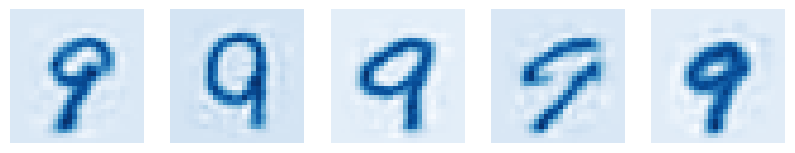

p = 783

label = 0


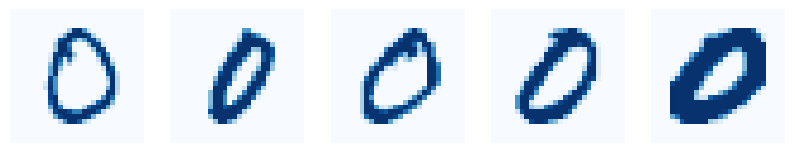

label = 1


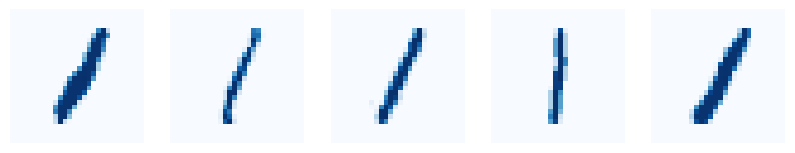

label = 2


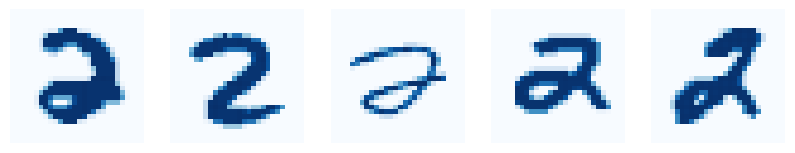

label = 3


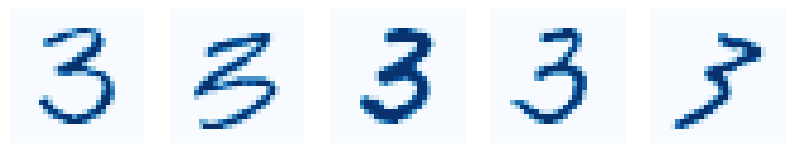

label = 4


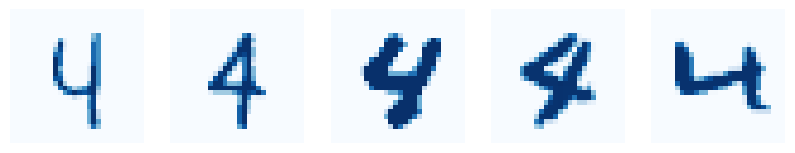

label = 5


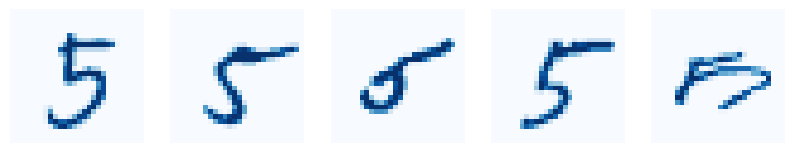

label = 6


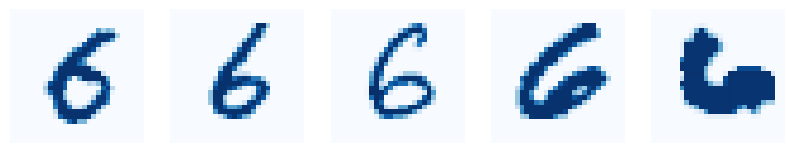

label = 7


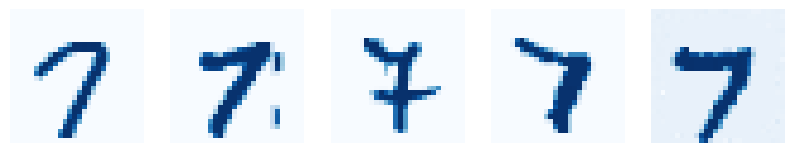

label = 8


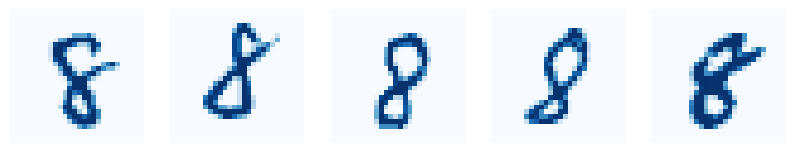

label = 9


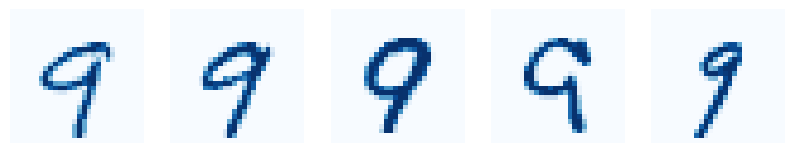

In [8]:
def plot_img(p, U, X_central, meanvals, num_images=5):
    Up = U[:, :p]
    UpY = np.dot(Up.T, X_central)
    Upy_added_mean = np.dot(Up, UpY) + meanvals

    fig, axes = plt.subplots(1, num_images, figsize=(num_images*2, 2))

    for i, ax in enumerate(axes.flat):
        img = np.real(Upy_added_mean[:, i].reshape(28, 28))
        ax.imshow(img, cmap='Blues')
        ax.axis('off')

    plt.show()

for p in [5, 10, 20, 100, 783]:
    print(f"p = {p}\n")
    for class_label in range(10):
        print(f"label = {class_label}")
        class_indices = np.where(y_train == class_label)[0]
        selected_indices = np.random.choice(class_indices, 5, replace=False)
        X_class = X_train[selected_indices].T
        X_central_class = X_class - np.mean(X_class, axis=0)
        mean_per_pixel_class = np.mean(X_class, axis=0)

        plot_img(p, U, X_central_class, mean_per_pixel_class)

In [9]:
class DiscriminantAnalysis:
    def __init__(self):
        self.priors = None
        self.means = None
        self.covariances = None

    def fit_model(self, data_features, data_labels):
        unique_classes = np.unique(data_labels)
        class_count = len(unique_classes)

        self.priors = np.zeros(class_count)
        self.means = []
        self.covariances = []

        for idx, cls in enumerate(unique_classes):
            cls_features = data_features[data_labels == cls]
            cls_prior = len(cls_features) / len(data_features)
            cls_mean = np.mean(cls_features, axis=0)
            cls_covariance = np.cov(cls_features, rowvar=False)

            self.priors[idx] = cls_prior
            self.means.append(cls_mean)
            self.covariances.append(cls_covariance)

    def discriminant_function(self, sample, cls_idx):
        mean_diff = sample - self.means[cls_idx]
        covariance_inverse = np.linalg.inv(self.covariances[cls_idx])
        determinant = np.linalg.det(self.covariances[cls_idx])
        if determinant == 0:
            determinant = 1e-6

        exp_component = -0.5 * np.dot(np.dot(mean_diff, covariance_inverse), mean_diff)
        return exp_component + np.log(determinant) / 2

    def classify_samples(self, dataset):
        predictions = np.zeros(len(dataset), dtype=int)

        for i, sample in enumerate(dataset):
            scores = [self.discriminant_function(sample, j) + np.log(self.priors[j]) for j in range(len(self.priors))]
            predictions[i] = np.argmax(scores)

        return predictions

def calculate_means_covariances(features, labels):
    means, covariances = [], []

    for label in np.unique(labels):
        label_features = features[labels == label]
        label_mean = np.mean(label_features, axis=0)
        label_covariance = np.cov(label_features, rowvar=False)

        means.append(label_mean)
        covariances.append(label_covariance)

    return np.array(means), np.array(covariances)

# Preparing the data
means, covariances = calculate_means_covariances(X_train, y_train)

def execute_discriminant_analysis(data, labels, priors):
    model = DiscriminantAnalysis()
    model.fit_model(data, labels)
    return model.classify_samples(data)

def accuracy_for_each_class(actual, predicted, label):
    correct_predictions = (predicted == actual) & (actual == label)
    return np.mean(correct_predictions)

accuracy_scores = []

def calculate_priors(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    priors = counts / counts.sum()
    return priors

priors = calculate_priors(y_train)


for dimension in [5, 10, 20]:
    reduced_features = U[:, :dimension].T.dot(X_test.T)

    predicted_labels = execute_discriminant_analysis(reduced_features.T, y_test, priors)

    overall_accuracy = np.mean(predicted_labels == y_test) * 100
    print(f"Dimension {dimension} - Overall Accuracy: {overall_accuracy:.2f}%")

    class_accuracies = []
    for label in range(10):
        label_accuracy = accuracy_for_each_class(y_test, predicted_labels, label) * 100
        class_accuracies.append(label_accuracy)
        print(f"Dimension {dimension} - Class {label} Accuracy: {10*label_accuracy:.2f}%")

    accuracy_scores.append((overall_accuracy, class_accuracies))


Dimension 5 - Overall Accuracy: 60.06%
Dimension 5 - Class 0 Accuracy: 91.60%
Dimension 5 - Class 1 Accuracy: 6.20%
Dimension 5 - Class 2 Accuracy: 86.40%
Dimension 5 - Class 3 Accuracy: 64.40%
Dimension 5 - Class 4 Accuracy: 40.90%
Dimension 5 - Class 5 Accuracy: 72.60%
Dimension 5 - Class 6 Accuracy: 44.10%
Dimension 5 - Class 7 Accuracy: 54.20%
Dimension 5 - Class 8 Accuracy: 65.60%
Dimension 5 - Class 9 Accuracy: 74.60%
Dimension 10 - Overall Accuracy: 78.51%
Dimension 10 - Class 0 Accuracy: 93.90%
Dimension 10 - Class 1 Accuracy: 5.30%
Dimension 10 - Class 2 Accuracy: 98.50%
Dimension 10 - Class 3 Accuracy: 89.50%
Dimension 10 - Class 4 Accuracy: 82.30%
Dimension 10 - Class 5 Accuracy: 78.80%
Dimension 10 - Class 6 Accuracy: 87.30%
Dimension 10 - Class 7 Accuracy: 80.30%
Dimension 10 - Class 8 Accuracy: 83.00%
Dimension 10 - Class 9 Accuracy: 86.20%
Dimension 20 - Overall Accuracy: 82.49%
Dimension 20 - Class 0 Accuracy: 95.70%
Dimension 20 - Class 1 Accuracy: 0.10%
Dimension 20 -